# Experiment Tutorial

In [1]:
%load_ext autoreload
%autoreload 2
    
import sys
sys.path.append('../..')

import torchvision
from shrinkbench.experiment import PruningExperiment

#The `DATAPATH` and `WEIGHTSPATH` environment variables are used to tell the framework where to look for datasets and pretrained weights respectively.
import os
os.environ['DATAPATH'] =  '../data'
os.environ['WEIGHTSPATH'] = '../pretrained/shrinkbench-models'

from IPython.display import clear_output, display
clear_output()

import torch
torch.cuda.is_available()

import matplotlib.pyplot as plt
import numpy as np

We run experiments for our MNIST network for logarithmically spaced compression ratios

In [2]:
for strategy in ['RandomPruning', 'GlobalMagWeight', 'LayerMagWeight']:
    for  c in [1, 2, 4]:#, 2, 4, 8, 16, 32, 64]:
        exp = PruningExperiment(dataset='MNIST', 
                                model='LeNet',
                                strategy=strategy,
                                compression=c,
                                train_kwargs={'optim': 'Adam', 'epochs': 2})
        print(exp)
        exp.run()
        clear_output()

We then collect output from experiment folders and plot the diferent metrics easily

In [7]:
from shrinkbench.plot import df_from_results, plot_df

In [8]:
neuron_exp = False  # isinstance(exp, NeuronPruningExperiment)
key = 'fraction' if neuron_exp else 'compression'
df = df_from_results('results', neuron_exp=neuron_exp)
display(df)

,dataset,model,strategy,compression,size,size_nz,real_compression,flops,flops_nz,speedup,...,post_acc5,last_acc1,last_acc5,seed,batch_size,epochs,optim,lr,completed_epochs,path
1,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,2,Adam,0.001,1,results/20210321-185331-XAJI-caaf5db27de6de317...
9,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-183333-XAJI-cfaa5803b3b7fd1c6...
12,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-182740-XAJI-cfaa5803b3b7fd1c6...
22,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,2,Adam,0.001,1,results/20210321-185331-XAJI-caaf5db27de6de317...
25,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-182730-A0G1-d7bf7e1317449e526...
28,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-183333-XAJI-cfaa5803b3b7fd1c6...
31,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-182740-XAJI-cfaa5803b3b7fd1c6...
34,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,2,Adam,0.001,1,results/20210321-185225-Z6ZE-07fa9558ce2beb716...
37,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-182949-XAJI-d7bf7e1317449e526...
40,MNIST,LeNet,GlobalMagWeight,1,60074,60074,1.000000,247272,247272.0,1.000000,...,0.988825,0.977551,0.988825,42,128,10,SGD,0.001,1,results/20210321-182749-XAJI-47f68a1ce84bd9a51...


With the provided functions, it is easy to generate plots 

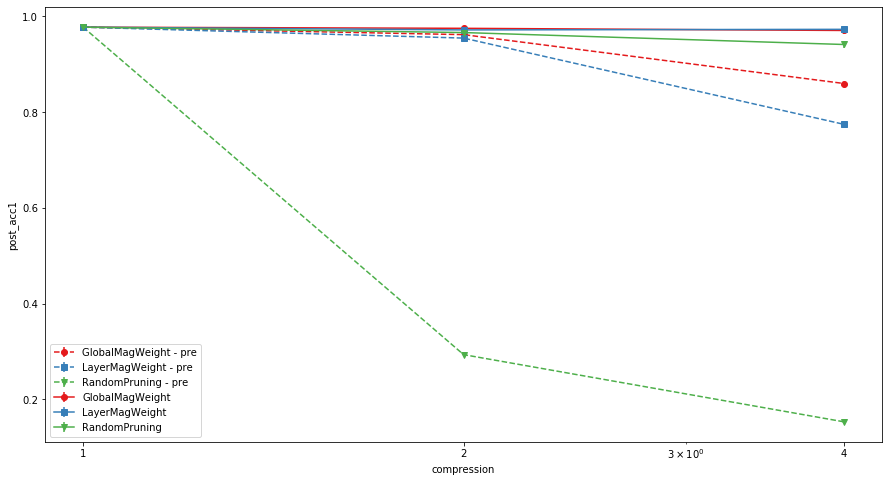

In [10]:
plot_df(df, key, 'pre_acc1', markers='strategy', line='--', colors='strategy', suffix=' - pre')
plot_df(df, key, 'post_acc1', markers='strategy', fig=False, colors='strategy')

We can also check the theoretical speedup and see that layerwise provides larger FLOPS speedups because of the even pruning of the conv layers

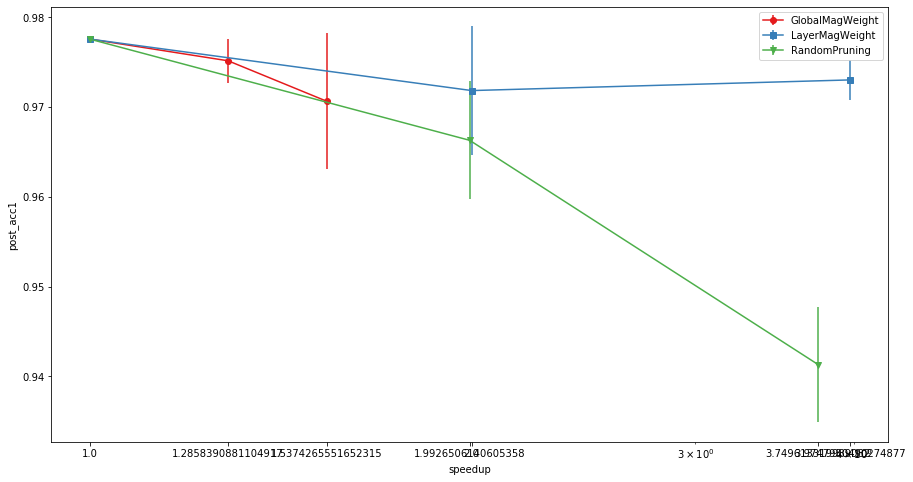

In [6]:
plot_df(df, 'speedup', 'post_acc1', colors='strategy', markers='strategy')
# plt.yscale('log')
# plt.ylim(0.996,0.9995)
# plt.xticks(2**np.arange(7))
# plt.gca().set_xticklabels(map(str, 2**np.arange(7)))
None

We can easily check if the compression is matching our expectation by looking at the relative error. As expected, random pruning does worst.

In [26]:
df['compression_err'] = (df['real_compression'] - df['compression'])/df['compression']

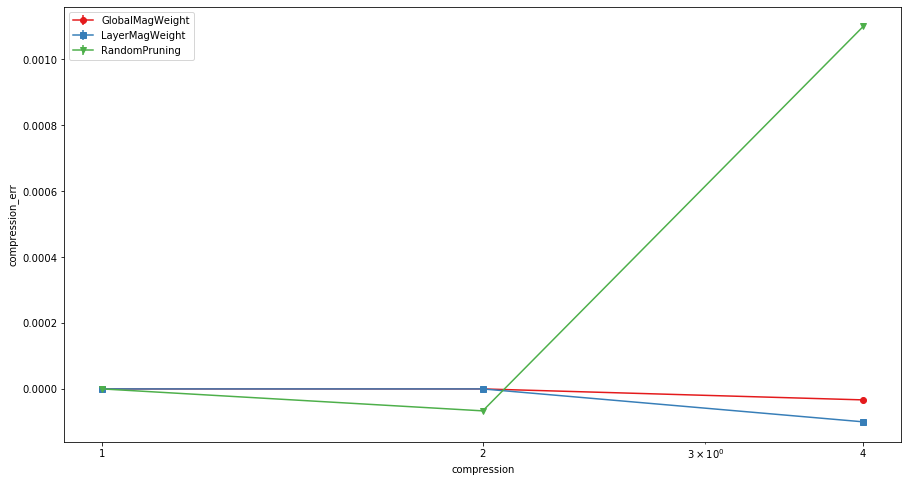

In [27]:
plot_df(df, 'compression', 'compression_err', colors='strategy', markers='strategy')